In [1]:
### IMPORTING
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageEnhance
import scipy.io
from skimage.util import random_noise

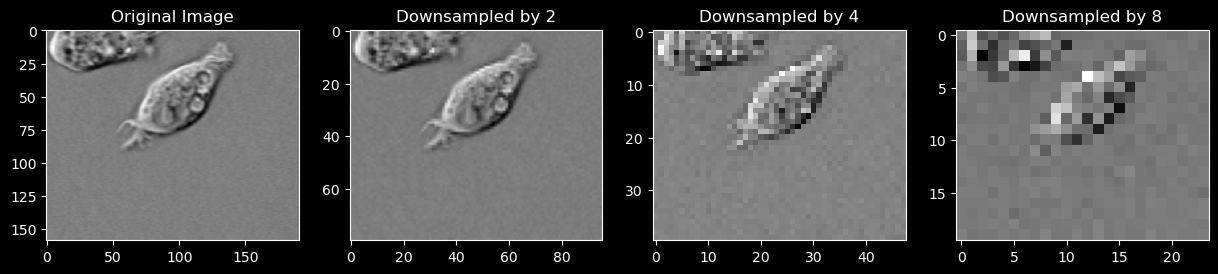

In [2]:
### GENERATE CELL IMAGES
cell = Image.open('C:\\Users\\esthe\Medical Imaging and Signal Processing\\cell.tif')

# convert to array
cell_orig = np.array(cell)

# create downsampled images
cell_2 = cell_orig[::2,::2]
cell_4 = cell_orig[::4,::4]
cell_8 = cell_orig[::8,::8]

# plot all images
fig, axs = plt.subplots(1,4, figsize=(15, 5))
axs[0].imshow(cell_orig, cmap = 'gray')
axs[0].set_title('Original Image')

axs[1].imshow(cell_2, cmap = 'gray')
axs[1].set_title('Downsampled by 2')

axs[2].imshow(cell_4, cmap = 'gray')
axs[2].set_title('Downsampled by 4')

axs[3].imshow(cell_8, cmap = 'gray')
axs[3].set_title('Downsampled by 8')

plt.show()

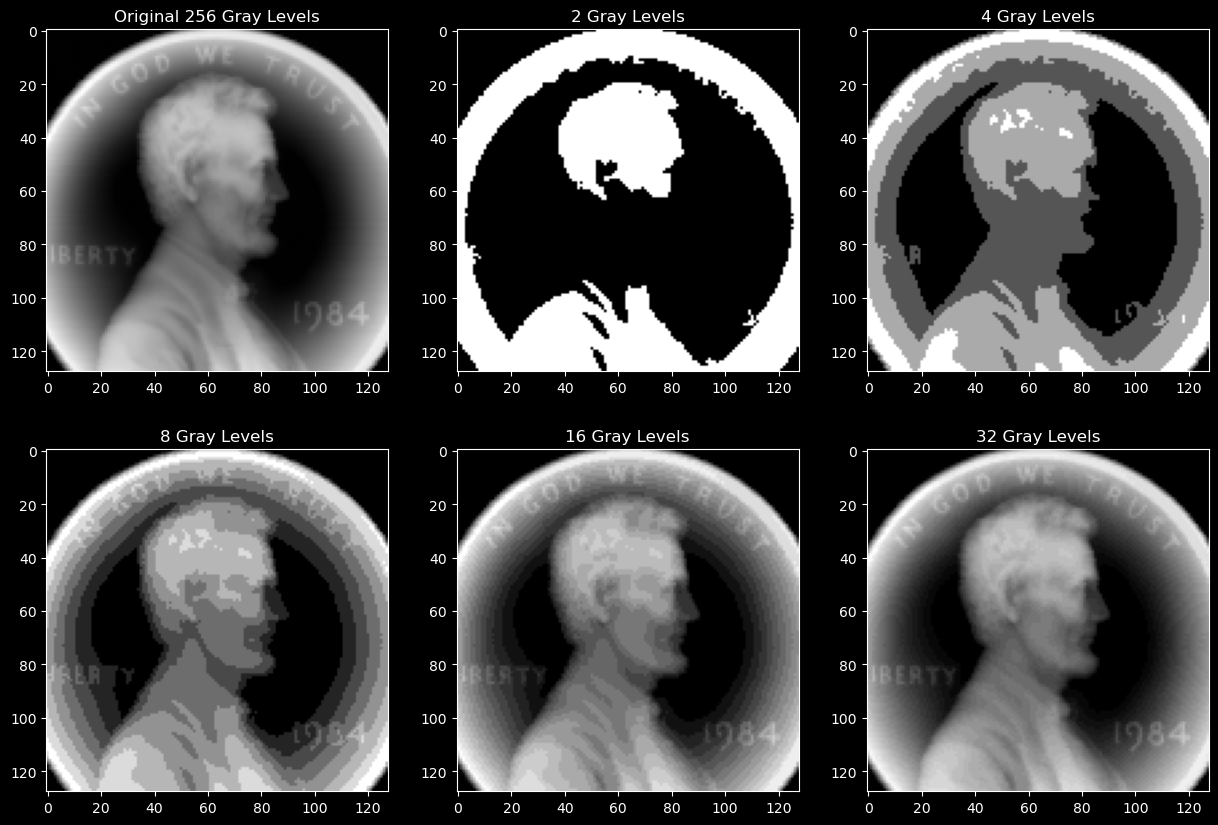

In [3]:
### GENERATE PENNY IMAGES
penny_file = scipy.io.loadmat('C:\\Users\\esthe\\Medical Imaging and Signal Processing\\penny.mat')
penny_img = penny_file['P']

# convert to array
penny_a = np.array(penny_img)

# create a function that reduces levels
def gray_level_reduce(array, n_levels):
    step = 256 / n_levels
    reduced_array = np.zeros_like(array)

    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            for x in range(1, n_levels + 1):
                if step * (x - 1) <= array[i, j] < step * x:
                    reduced_array[i, j] = step * (x - 1)
                    break
    return reduced_array

# reduce to 2 levels
penny2 = gray_level_reduce(penny_a, 2)
# 4 levels
penny4 = gray_level_reduce(penny_a, 4)
# 8 lebels
penny8 = gray_level_reduce(penny_a, 8)
# 16 levels
penny16 = gray_level_reduce(penny_a, 16)
# 32 levels
penny32 = gray_level_reduce(penny_a, 32)

# plot
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs[0,0].imshow(penny_a, cmap='gray')
axs[0,0].set_title('Original 256 Gray Levels')

axs[0,1].imshow(penny2, cmap = 'gray')
axs[0,1].set_title('2 Gray Levels')

axs[0,2].imshow(penny4, cmap = 'gray')
axs[0,2].set_title('4 Gray Levels')

axs[1,0].imshow(penny8, cmap = 'gray')
axs[1,0].set_title('8 Gray Levels')

axs[1,1].imshow(penny16, cmap = 'gray')
axs[1,1].set_title('16 Gray Levels')

axs[1,2].imshow(penny32, cmap = 'gray')
axs[1,2].set_title('32 Gray Levels')

plt.show()

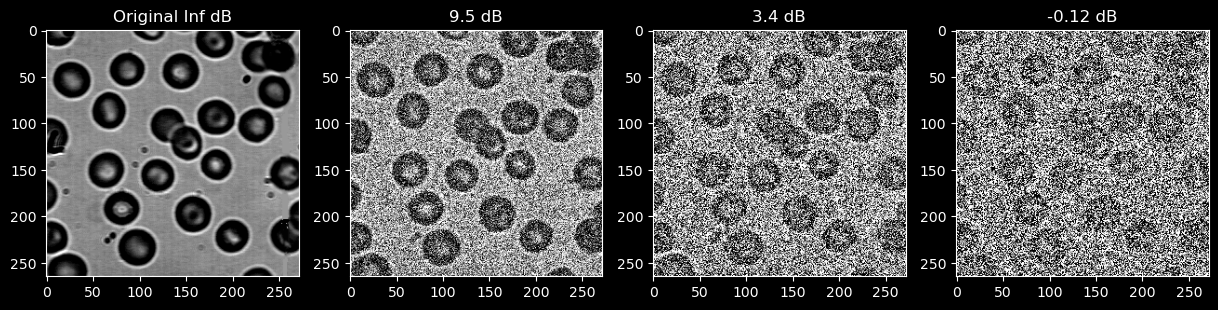

In [4]:
### GENERATE BLOOD IMAGES
blood = Image.open('C:\\Users\\esthe\\Medical Imaging and Signal Processing\\blood1.tif')

# convert to array
blood_a = np.array(blood)

# create a function that gives the noise power variance for a specific dB SNR ratio
def calc_noise_var(snr_db, signal_variance):
    # calc ratio of signal power to noise power from SNR (in dB)
    snr_linear = 10**(snr_db / 10.0)
    
    # Calculate the noise variance
    noise_variance = signal_variance / snr_linear
    
    return noise_variance/100

# var for 9.5 dB
var9 = calc_noise_var(9.5, 100)
# car for 3.4
var3 = calc_noise_var(3.4, 100)
# var for -0.12
var0 = calc_noise_var(-0.12, 100)

# create the noisy images
noise9 = random_noise(blood_a, mode='gaussian', var = var9)
noise3 = random_noise(blood_a, mode='gaussian', var = var3)
noise0 = random_noise(blood_a, mode='gaussian', var = var0)

# plot noisy images
fig, axs = plt.subplots(1,4, figsize = (15, 5))

axs[0].imshow(blood_a, cmap = 'gray')
axs[0].set_title('Original Inf dB')

axs[1].imshow(noise9, cmap = 'gray')
axs[1].set_title('9.5 dB')

axs[2].imshow(noise3, cmap = 'gray')
axs[2].set_title('3.4 dB')

axs[3].imshow(noise0, cmap = 'gray')
axs[3].set_title('-0.12 dB')

plt.show()